In [36]:
import json
from glob import glob
import sklearn.decomposition
import sklearn.preprocessing
import sklearn.feature_extraction
import sklearn.pipeline

In [82]:
import matplotlib.pyplot as plt
%matplotlib nbagg

import numpy as np

In [7]:
def chunker(lines):
    
    chunks = []
    chunk = ''
    speaker_id = lines[0]['speaker_id']
    
    for line in lines:
        if speaker_id == line['speaker_id']:
            chunk = chunk + ' ' + line['best_text']
        else:
            chunks.append(chunk)
            chunk = line['best_text']
            speaker_id = line['speaker_id']
            
    chunks.append(chunk)
    return chunks

In [111]:
files = sorted(glob('/home/bmcfee/data/data-*/transcripts/json/*.json'))

In [112]:
docs = []
for file in files:
    data = json.load(open(file, 'r'))
    docs.extend(chunker(data['lines']))

In [113]:
len(docs)

3238

In [114]:
P = sklearn.pipeline.Pipeline( [('counts', sklearn.feature_extraction.text.CountVectorizer(strip_accents='ascii',
                                                                                           #max_df=0.5,
                                                                                           stop_words='english')),
                                ('LDA', sklearn.decomposition.LatentDirichletAllocation(n_topics=32,
                                                                                        batch_size=32,
                                                                                        max_iter=128))])

In [115]:
y = P.fit_transform(docs)

<IPython.core.display.Javascript object>


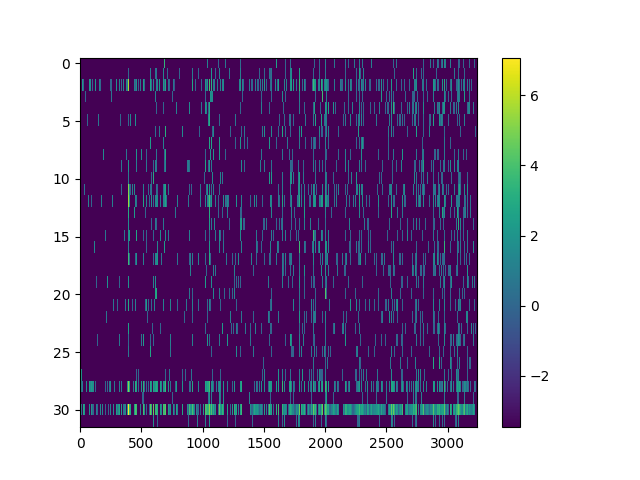

In [116]:
plt.imshow(np.log(y).T, aspect='auto')
plt.colorbar()

In [119]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()
    print()

In [120]:
print("\nTopics in LDA model:")
n_top_words = 10
tf_feature_names = P.steps[0][1].get_feature_names()
print_top_words(P.steps[1][1], tf_feature_names, n_top_words)


Topics in LDA model:
Topic #0:
legs man washington explain drawing structure opinion dreams accept judges

Topic #1:
street minutes gore paper sounds wall grade single strange leg

Topic #2:
said went school says day dad city high working help

Topic #3:
jokes suddenly absolutely study dogs train director worst plans mad

Topic #4:
poetry united federal reasons americans security cities leaders marvelous worse

Topic #5:
government audience nature supposed parliament wasn earth maybe awful johnson

Topic #6:
uh drawings policy influence underwater save adopted bones queens length

Topic #7:
um applause shirt la arms entirely scientific interviews googling instrument

Topic #8:
italian movies leaving value problem favorite necessary tells google research

Topic #9:
american bit little tell wrote history hour pull architecture section

Topic #10:
phone completely personal attack domino statement dollar forces assume inch

Topic #11:
years ago met old sound parents record doing floor gra